In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
import numpy as np
import pandas as pd

In [5]:
import csv
with open('VDR_IC50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";") 
    rawdata = [x for x in reader] 
rawdata[0]

{'Molecule ChEMBL ID': 'CHEMBL385265',
 'Molecule Name': '',
 'Molecule Max Phase': '0',
 'Molecular Weight': '540.79',
 '#RO5 Violations': '2',
 'AlogP': '6.30',
 'Compound Key': '81b',
 'Smiles': 'C=C1/C(=C\\C=C2/CCC[C@@]3(C)[C@H]2CC[C@@H]3[C@H](C)C[C@@H]2OC(=O)C(=C)[C@H]2CC(C)C)C[C@@H](O)[C@H](CCCO)[C@@H]1O',
 'Standard Type': 'IC50',
 'Standard Relation': "'='",
 'Standard Value': '9.3',
 'Standard Units': 'nM',
 'pChEMBL Value': '8.03',
 'Data Validity Comment': '',
 'Comment': '',
 'Uo Units': 'UO_0000065',
 'Ligand Efficiency BEI': '',
 'Ligand Efficiency LE': '',
 'Ligand Efficiency LLE': '',
 'Ligand Efficiency SEI': '',
 'Potential Duplicate': 'False',
 'Assay ChEMBL ID': 'CHEMBL910037',
 'Assay Description': 'Antagonist activity against 1-alpha,25-dihydroxy vitamin D3-induced HL60 cell differentiation by NBT reduction method',
 'Assay Type': 'F',
 'BAO Format ID': 'BAO_0000219',
 'BAO Label': 'cell-based format',
 'Assay Organism': 'Homo sapiens',
 'Assay Tissue ChEMBL ID': 

In [46]:
#reprezentace dat pomoci pandas
table = pd.DataFrame(rawdata)
display(table)
print("Pocet sloupcu:" , len(table))

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL385265,,0,540.79,2,6.30,81b,C=C1/C(=C\C=C2/CCC[C@@]3(C)[C@H]2CC[C@@H]3[C@H...,IC50,'=',...,Vitamin D receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL1137357,1,Scientific Literature,J. Med. Chem.,2006,CHEMBL3307654,
1,CHEMBL213868,,0,454.65,1,5.66,5,C=C1/C(=C\C=C2/CCC[C@@]3(C)[C@H]2CC[C@@H]3[C@H...,IC50,'=',...,Vitamin D receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL1137357,1,Scientific Literature,J. Med. Chem.,2006,CHEMBL3307654,
2,CHEMBL1551,URSODIOL,4,392.58,0,4.48,UDCA,C[C@H](CCC(=O)O)[C@H]1CC[C@H]2[C@@H]3[C@@H](O)...,IC50,'>',...,Vitamin D receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3763103,1,Scientific Literature,Eur. J. Med. Chem.,2016,None,
3,CHEMBL442191,,0,416.65,1,5.70,2,C=C1/C(=C\C=C2/CCC[C@@]3(C)[C@H]2CC[C@@H]3[C@@...,IC50,,...,Vitamin D receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL1149414,1,Scientific Literature,J. Med. Chem.,2006,CHEMBL3307648,
4,CHEMBL442191,,0,416.65,1,5.70,2,C=C1/C(=C\C=C2/CCC[C@@]3(C)[C@H]2CC[C@@H]3[C@@...,IC50,,...,Vitamin D receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL1149414,1,Scientific Literature,J. Med. Chem.,2006,None,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,CHEMBL4218638,,0,381.43,0,4.34,8b,COC(=O)CCc1ccc(OCc2oc(-c3cccc(OC)c3)nc2C)cc1,IC50,'=',...,Vitamin D receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4184110,1,Scientific Literature,Bioorg Med Chem Lett,2018,None,
639,CHEMBL4209440,,0,367.40,0,3.95,7b,COC(=O)Cc1ccc(OCc2oc(-c3cccc(OC)c3)nc2C)cc1,IC50,'=',...,Vitamin D receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4184110,1,Scientific Literature,Bioorg Med Chem Lett,2018,None,
640,CHEMBL4068172,,0,416.65,1,5.70,"1,25(OH)2D3",C=C1/C(=C\C=C2/CCC[C@]3(C)C(C(C)CCCC(C)(C)O)CC...,IC50,'=',...,Vitamin D receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3997830,1,Scientific Literature,Bioorg Med Chem Lett,2017,None,
641,CHEMBL4075907,,0,541.82,2,6.70,11b,CCN(CC)CCCNC(=O)c1ccc(C(CC)(CC)c2ccc(OCCC(O)(C...,IC50,'=',...,Vitamin D receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4033800,1,Scientific Literature,J Med Chem,2018,None,


Pocet sloupcu: 643


In [21]:
names_column = list(table)
names_column

['Molecule ChEMBL ID',
 'Molecule Name',
 'Molecule Max Phase',
 'Molecular Weight',
 '#RO5 Violations',
 'AlogP',
 'Compound Key',
 'Smiles',
 'Standard Type',
 'Standard Relation',
 'Standard Value',
 'Standard Units',
 'pChEMBL Value',
 'Data Validity Comment',
 'Comment',
 'Uo Units',
 'Ligand Efficiency BEI',
 'Ligand Efficiency LE',
 'Ligand Efficiency LLE',
 'Ligand Efficiency SEI',
 'Potential Duplicate',
 'Assay ChEMBL ID',
 'Assay Description',
 'Assay Type',
 'BAO Format ID',
 'BAO Label',
 'Assay Organism',
 'Assay Tissue ChEMBL ID',
 'Assay Tissue Name',
 'Assay Cell Type',
 'Assay Subcellular Fraction',
 'Assay Parameters',
 'Assay Variant Accession',
 'Assay Variant Mutation',
 'Target ChEMBL ID',
 'Target Name',
 'Target Organism',
 'Target Type',
 'Document ChEMBL ID',
 'Source ID',
 'Source Description',
 'Document Journal',
 'Document Year',
 'Cell ChEMBL ID',
 'Properties']

In [47]:
table_new = table[['Molecule ChEMBL ID' , 'Molecular Weight', 'AlogP',  'Smiles','Standard Type',]]
#columns ktere podle me budu pouzivat
table_new


,Molecule ChEMBL ID,Molecular Weight,AlogP,Smiles,Standard Type
0,CHEMBL385265,540.79,6.30,C=C1/C(=C\C=C2/CCC[C@@]3(C)[C@H]2CC[C@@H]3[C@H...,IC50
1,CHEMBL213868,454.65,5.66,C=C1/C(=C\C=C2/CCC[C@@]3(C)[C@H]2CC[C@@H]3[C@H...,IC50
2,CHEMBL1551,392.58,4.48,C[C@H](CCC(=O)O)[C@H]1CC[C@H]2[C@@H]3[C@@H](O)...,IC50
3,CHEMBL442191,416.65,5.70,C=C1/C(=C\C=C2/CCC[C@@]3(C)[C@H]2CC[C@@H]3[C@@...,IC50
4,CHEMBL442191,416.65,5.70,C=C1/C(=C\C=C2/CCC[C@@]3(C)[C@H]2CC[C@@H]3[C@@...,IC50
...,...,...,...,...,...
638,CHEMBL4218638,381.43,4.34,COC(=O)CCc1ccc(OCc2oc(-c3cccc(OC)c3)nc2C)cc1,IC50
639,CHEMBL4209440,367.40,3.95,COC(=O)Cc1ccc(OCc2oc(-c3cccc(OC)c3)nc2C)cc1,IC50
640,CHEMBL4068172,416.65,5.70,C=C1/C(=C\C=C2/CCC[C@]3(C)C(C(C)CCCC(C)(C)O)CC...,IC50
641,CHEMBL4075907,541.82,6.70,CCN(CC)CCCNC(=O)c1ccc(C(CC)(CC)c2ccc(OCCC(O)(C...,IC50


In [53]:
#Kontrola
ligand_ids = table_new['Molecule ChEMBL ID']
ligand_mols = [Chem.MolFromSmiles(mol) for mol in table_new["Smiles"]]

len(ligand_ids), len(ligand_mols)

(643, 643)

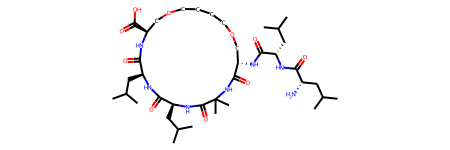

In [61]:
#krasna molekula
ligand_mols[7]

In [62]:
[x for x in ligand_mols if not x]

[]

In [71]:
ligand_rings = [Chem.GetSSSR(ligand) for ligand in ligand_mols]
ligand_rings[5]

3

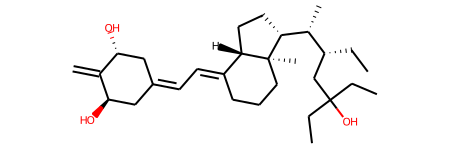

In [72]:
ligand_mols[5]

In [73]:
sum(ligand_rings)/len(ligand_mols)

3.5225505443234835